# Feature analysis

Import libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Read main csv file:

In [2]:
application_train = pd.read_csv('data/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Get description of each column in datasets:

In [3]:
column_description = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = "ISO-8859-1").iloc[:, 1:]
column_description.head()

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
def extract_description(description=column_description, table_name='application_{train|test}.csv'):
    """
    Extract description of table columns.
    
    Arguments:
        description - pd.DataFrame with columns = ['Table', 'Row', 'Description', 'Special']
        table_name - string in 'Table'
    Returns:
        table - pd.DataFrame
    """
    # Extraction
    table = description[description['Table']==table_name][['Row', 'Description']]
    
    # Postprocessing
    table.index = table['Row']
    table = table[['Description']].T
    table.columns.name = None
    return table

application_description = extract_description()
application_description

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,Did client provide document 18,Did client provide document 19,Did client provide document 20,Did client provide document 21,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...


### 2. Split features on "Categorical" (nominal, binary) and "Numerical"(continuous, ordinal). 

Type of features in data:

In [5]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Data contains 65 continuous features, 41 descrete and 16 categorical.

#### 2.1 Find CATEGORICAL and NUMERICAL features

In [15]:
# "SK_ID_CURR", "TARGET" are not features
all_columns = application_train.columns[2:]

# Find columns with "object" dtype - categorical features
cat_columns = list(application_train.select_dtypes('object').columns)

# Categorical features includes binary, nominal
binary_columns = []
nominal_columns = []


# Numerical features
num_columns = []
ordinal_columns = []

# Probably categorical, contains few unique values
probably_cat_columns = []

# Check each column
for column in all_columns:
    
    # Number of unique values in column
    n_unique = len(application_train[column].unique())
    
    if column in cat_columns:
        # Check if binary
        if n_unique == 2:
            binary_columns.append(column)
    else:
        # Check if binary
        if n_unique == 2:
            binary_columns.append(column)
            # Add to categorical if not added yet
            cat_columns.append(column)
        
        # Put to waiting list
        if 3 <= n_unique <= 15:
            probably_cat_columns.append(column)    
            
# Find numerical features
num_columns = [column for column in all_columns if column not in cat_columns]
nominal_columns = [column for column in cat_columns if column not in binary_columns]

print('Categorical + Numerical == All  is ', len(all_columns) == len(cat_columns) + len(num_columns))
print('Nominal + Binary == Categorical  is ', len(cat_columns) == len(nominal_columns) + len(binary_columns))

Categorical + Numerical == All  is  True
Nominal + Binary == Categorical  is  True


#### 2.2 Show "potentially" categorical features:

In [16]:
for column in probably_cat_columns:
    print("\n==========\n\033[1m", column, '\033[0m-', application_description[column].values[0], "\n==========")
    print(application_train[column].value_counts(normalize=True))


 CNT_CHILDREN - Number of children the client has 
0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

 REGION_RATING_CLIENT - Our rating of the region where client lives (1,2,3) 
2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64

 REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives with taking city into account (1,2,3) 
2    0.746263
3    0.142629
1    0.111108
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

 DEF_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 30 DPD (days past due)  
0.0     0.885262
1.0     0.092427
2.0     0.017368
3.0     0.003889
4.0     0.000825
5.0     0.000183
6.0     0.000036
7.0     0.000003
8.0     0.000003
34.0    0.000003
Name: DEF_30_CNT_SOCIAL_CIRC

All these features are **Numerical**.

Some of features contains outliers in data. 

In [17]:
rows_to_drop = []

rows_to_drop.extend(np.where(application_train['AMT_REQ_CREDIT_BUREAU_QRT']==261)[0])
rows_to_drop.extend(np.where(application_train['DEF_60_CNT_SOCIAL_CIRCLE']==24)[0])
rows_to_drop.extend(np.where(application_train['DEF_30_CNT_SOCIAL_CIRCLE']==34)[0])
rows_to_drop.extend(np.where(application_train['CNT_CHILDREN']==19)[0])

print(f"Rows to drop {rows_to_drop}")

Rows to drop [239474, 148403, 148403, 155369, 265784]


#### 2.3 Show nominal features

In [18]:
for column in nominal_columns:
    print("\n==========\n\033[1m", column, '\033[0m-', application_description[column].values[0], "\n==========")
    print(application_train[column].value_counts(normalize=True))


 CODE_GENDER - Gender of the client 
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

 NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan 
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

 NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave,) 
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

 NAME_EDUCATION_TYPE - Level of highest education the client achieved 
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher   

**CODE_GENDER** - binary feature

**NAME_EDUCATION_TYPE** - ordinal feature

**ORGANIZATION_TYPE** - contains a lot of values, could be useless

In [19]:
# Binary
binary_columns.append('CODE_GENDER')
nominal_columns.remove('CODE_GENDER')

# Ordinal
nominal_columns.remove('NAME_EDUCATION_TYPE')
cat_columns.remove('NAME_EDUCATION_TYPE')
num_columns.append('NAME_EDUCATION_TYPE')
ordinal_columns.append('NAME_EDUCATION_TYPE')

# Useless
useless_columns = ['ORGANIZATION_TYPE']

print('Categorical + Numerical == All  is ', len(all_columns) == len(cat_columns) + len(num_columns))
print('Nominal + Binary == Categorical  is ', len(cat_columns) == len(nominal_columns) + len(binary_columns))

Categorical + Numerical == All  is  True
Nominal + Binary == Categorical  is  True


Close to binary (can transform to binary):
* **HOUSETYPE_MODE** - could tranform to (Flats - 98%, Not Flats - 2%)
* **NAME_TYPE_SUITE** - could tranform to (Unaccompanied - 81%, accompanied - 19%)
* **NAME_FAMILY_STATUS** - could tranform to (Have pair - 70%, Dont have pair - 30%)
* **NAME_HOUSING_TYPE** - could tranform to (House - 89%, Not house - 11%)
* **WEEKDAY_APPR_PROCESS_START** - could tranform to (Weekday - 84%, Weekend - 16%)

#### 2.4 Create transformation dictionary for categories

In [20]:
transform_categories = dict()

transform_categories['NAME_EDUCATION_TYPE'] = {"Lower secondary": 1,
                                               "Secondary / secondary special": 2,
                                               "Incomplete higher": 3,
                                               "Higher education": 4,
                                               "Academic degree": 5,
                                                np.nan: 2}
              
    
transform_categories['HOUSETYPE_MODE'] = {"block of flats": 1,
                                          "specific housing": 0,
                                          "terraced house": 0,
                                           np.nan: 1}          

transform_categories['NAME_TYPE_SUITE'] = {"Unaccompanied": 1,
                                           "Family": 0,
                                           "Spouse, partner": 0,
                                           "Children": 0,
                                           "Other_B": 0,
                                           "Other_A": 0,
                                           "Group of people": 0,
                                            np.nan: 1,}   

transform_categories['NAME_FAMILY_STATUS'] = {"Married": 1,
                                              "Unknown": 1,
                                              "Civil marriage": 1,
                                              "Single / not married": 0,
                                              "Separated": 0,
                                              "Widow": 0,
                                               np.nan: 1}

transform_categories['NAME_HOUSING_TYPE'] = {"House / apartment": 1,
                                             "With parents": 0,
                                             "Municipal apartment": 0,
                                             "Rented apartment": 0,
                                             "Office apartment": 0,
                                             "Co-op apartment": 0,
                                              np.nan: 1}


transform_categories['WEEKDAY_APPR_PROCESS_START'] = {"MONDAY": 1,
                                                      "TUESDAY": 1,
                                                      "WEDNESDAY": 1,
                                                      "THURSDAY": 1,
                                                      "FRIDAY": 1,
                                                      "SATURDAY": 0,
                                                      "SUNDAY": 0,
                                                       np.nan: 1}
                                                      

### 3. Categorical feature Analysis

Show **categorical features:**

In [21]:
cat_train = application_train[cat_columns]
cat_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,M,N,Y,Unaccompanied,Working,Single / not married,House / apartment,Laborers,WEDNESDAY,...,0,0,0,0,0,0,0,0,0,0
1,Cash loans,F,N,N,Family,State servant,Married,House / apartment,Core staff,MONDAY,...,0,0,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Single / not married,House / apartment,Laborers,MONDAY,...,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Civil marriage,House / apartment,Laborers,WEDNESDAY,...,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Single / not married,House / apartment,Core staff,THURSDAY,...,0,0,0,0,0,0,0,0,0,0


#### 3.1 Distribution of categorical features in default and not default group.

Create vizualization function:

In [22]:
def plot_cat_distbars(column_names=None, data=None):
    """ Plots distribution bars with seaborn and pyplot."""
    if data is None:
        data = application_train.copy()
    
    if column_names is None:
        column_names = cat_columns
    elif type(column_names) != list:
        column_names = [column_names]
    else:
        pass
    
    n_charts = len(column_names)
    plt_nrows = n_charts

    fig = plt.figure(figsize=(16, 5*plt_nrows))
    gs = fig.add_gridspec(plt_nrows, 2, hspace=0.4)
    
    for i, column in enumerate(column_names):
        
        if data[column].dtype != object:
            data[column] = data[column].astype('str')
        
        # Find distribution
        def_vals = data[data.TARGET == 1][column].value_counts(normalize=True)
        undef_vals = data[data.TARGET == 0][column].value_counts(normalize=True)
        all_vals = data[column].value_counts(normalize=True)
        
        # Labels of bins
        all_labels = all_vals.index
        def_labels = def_vals.index
        undef_labels = undef_vals.index

        # Plot two charts if frequency of most common a lot more than least common.
        if max(all_vals) > 10*min(all_vals):
            # Find most common names and others
            major_labels = [label for label in all_labels if (all_vals[label]>0.1*max(all_vals))]
            minor_labels = all_labels[len(major_labels):]
            
            major_values = {'def': def_vals[major_labels],
                            'undef': undef_vals[major_labels]}

            minor_values = {'def': def_vals[minor_labels],
                            'undef': undef_vals[minor_labels]}
            
            
            ax_title = fig.add_subplot(gs[i, :], frameon = False)
            ax_title.set_xticks([])
            ax_title.set_yticks([])
            ax_title.set_title(column)
            
            ax_maj = fig.add_subplot(gs[i, 0])
            ax_min = fig.add_subplot(gs[i, 1])

            plt.sca(ax_maj)
            plt.xticks(rotation=30)
            ax_maj.bar(major_labels, major_values['def'], label='default', color='r', width=0.6)
            ax_maj.bar(major_labels, major_values['undef'], label='good', color='g', width=0.6, align='edge')
            plt.legend()
                
            plt.sca(ax_min)
            plt.xticks(rotation=30)
            ax_min.bar(minor_labels, minor_values['def'], label='default', color='r', width=0.6)
            ax_min.bar(minor_labels, minor_values['undef'], label='good', color='g', width=0.6, align='edge')
            plt.legend()
        
        # Plot one chart.
        else:
            ax = fig.add_subplot(gs[i, :])
            plt.sca(ax)
            plt.title(column)
            ax.bar(def_labels, def_vals, label='default', color='r', width=0.6)
            ax.bar(undef_labels, undef_vals, label='good', color='g', width=0.6, align='edge')
            plt.xticks(rotation=30)
            plt.legend()
    plt.show()

#### 3.2 Distribution of nominal 

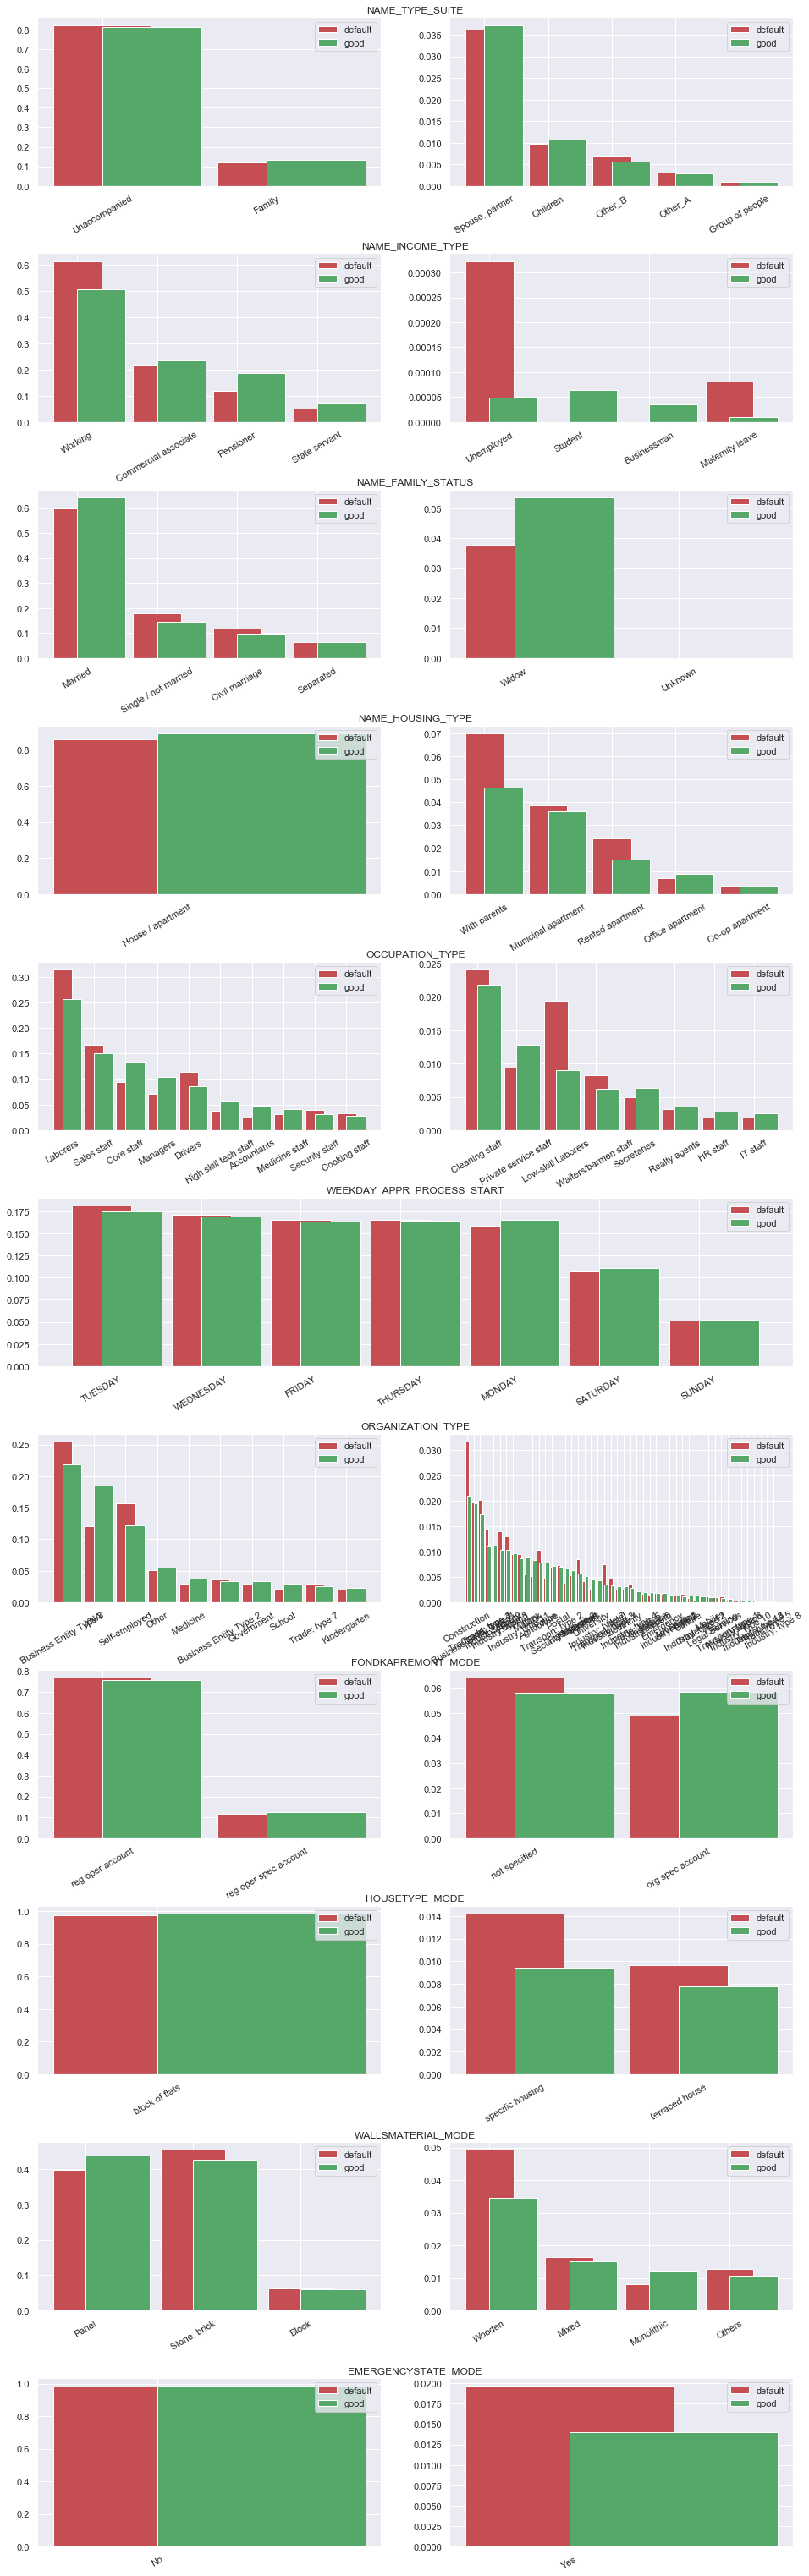

In [23]:
plot_cat_distbars(nominal_columns)

As we can see "Unemployed" and "Maternity leave" are at **risk**.

#### 3.3 Distribution of binary

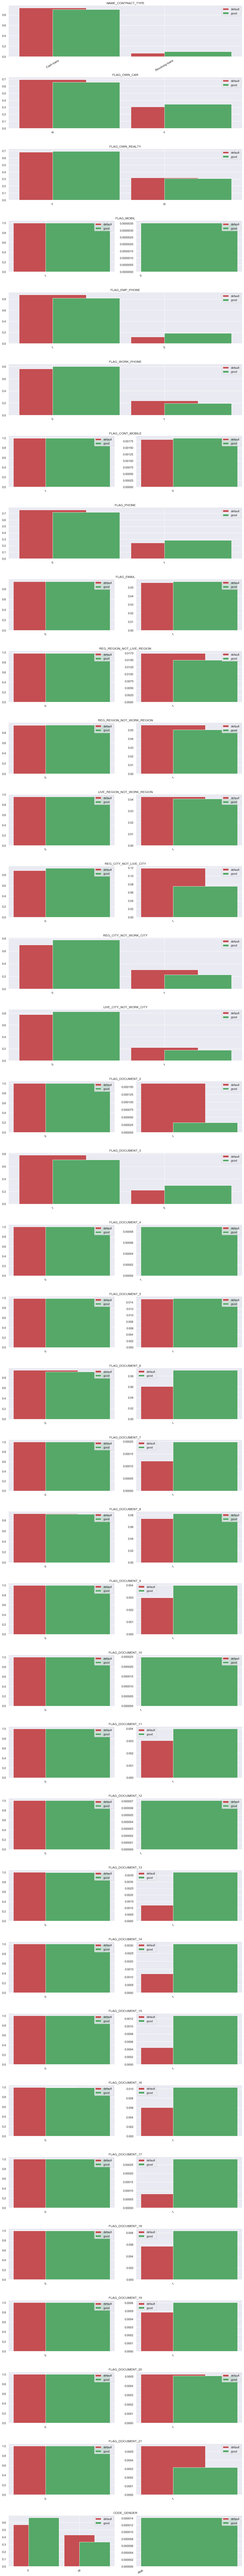

In [24]:
plot_cat_distbars(binary_columns)

#### 3.4 Distribution of ordinal 

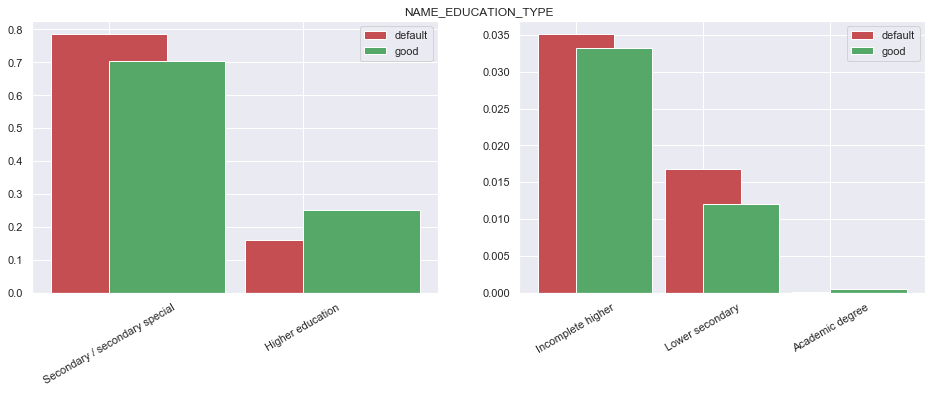

In [25]:
plot_cat_distbars(ordinal_columns)